# Question1. As you observed in Homework 5.4, forward and backward Euler both make errors.  Combining the two of them, however, can be surprisingly effective.  Implement a solver that averages a forward and backward Euler step:


\begin{eqnarray}
 x(t+\Delta{t} ) = x(t) + \frac{\Delta t}{2} [f(x(t)) + f(x_{FE}(t+\Delta t))]
\end{eqnarray}

Here, $x_{FE}(t+\Delta t)$ is the result of applying one step of the forward Euler algorithm starting from  with time step Δt.  This method averages the slope at that point with the slope at the original point and uses that averaged slope to move forward.  This is sometimes called the trapezoidal method in the literature.

(a) Use this solver to generate a trajectory of the simple harmonic oscillator ODEs with k = 2, m = 0.5, and β = 0.  Start from the initial condition [x(t = 0), v(t = 0)]T = [-1, -2]T with a time step Δt = 0.1.  What is [x(t = 0.5), v(t = 0.5)]T?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SHO(input, k, m):
    return np.array([input[1], -input[0]*k/m])

In [3]:
# initial setups
k = 2; m = 0.5; dt = 0.1;
t= 0; inputs = np.array([-1,-2]);
TimeStep = 5;

In [4]:
def trapezoidal(inputs, k, m, dt, t,TimeStep):
    results = np.zeros((TimeStep, 2));
    
    for t in range(TimeStep):
        forward_input = SHO(inputs + dt*SHO(inputs,k,m), k, m);
        inputs = inputs + dt/2*(SHO(inputs,k,m) + forward_input);
        results[t, :] = inputs;
        t = dt + t

    return inputs, results

In [5]:
trapezoidal(inputs,k,m,dt,t,TimeStep)

(array([-1.38114016,  0.62114433]), array([[-1.18      , -1.56      ],
        [-1.3124    , -1.0568    ],
        [-1.391832  , -0.510704  ],
        [-1.41506576,  0.05624288],
        [-1.38114016,  0.62114433]]))

# Answer: -1.38114016,  0.62114433

# (b) Generate a 500-point trajectory of the same ODE system from [x(t = 0), v(t = 0)]T = [-1, -2]T with a time step of Δt = 0.01.  Which of the following describes this trajectory?

In [6]:
# initial setups
k = 2; m = 0.5; dt = 0.01;
t= 0; inputs = np.array([-1,-2]);
TimeStep = 500;

In [7]:
inputs, results = trapezoidal(inputs,k,m,dt,t,TimeStep);

In [8]:
plt.plot(results[:,0], results[:,1])

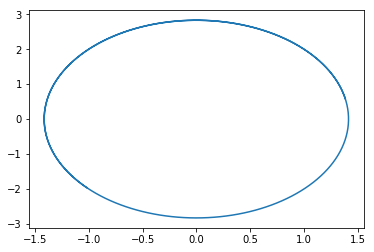

In [9]:
plt.show()

# (c) Remember that the simple harmonic oscillator has no damping (friction).  Keeping this in mind, does the trajectory that you generated in part (b) of this problem seem more accurate than the trajectory computed by either your forward or backward Euler code from Homework 5.4?

# Answer: True

# (d) Now generate a 5000-point trajectory of the same ODE system from [x(t = 0), v(t = 0)]T = [-1, -2]T with a time step of Δt = 0.01.  How is this plot qualitatively different than the plot you generated in part (b)?

In [10]:
# initial setups
k = 2; m = 0.5; dt = 0.01;
t= 0; inputs = np.array([-1,-2]);
TimeStep = 5000;

In [11]:
inputs, results = trapezoidal(inputs,k,m,dt,t,TimeStep);

In [12]:
plt.plot(results[:,0], results[:,1])

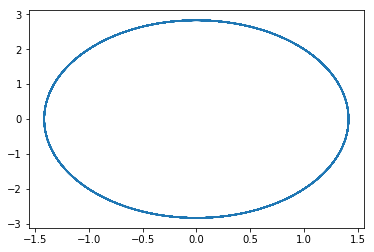

In [13]:
plt.show()

# Answer: A. The trajectory has "fattened," taking up more space

# (e) What could be the cause of this difference?

# Answer: B. Numerical error is violating the conservation of energy property of a SHO with β = 0; since this system is a conservative system a symplectic integrator should be used.